## Assignment: 

In this assignment, you will build a convolutional neural network that learns to predict one of the 10 classes of the Fashion-MNIST dataset which comprises grayscale images of 10 different classes of clothes. 

1.	You will use TensorFlow for this assignment. Make sure that you have a working python virtual environment and that you have installed any packages required. 
2.	The first objective is to go to these link, download the dataset and run the code. Follow all the steps of this tutorial, put some images on your report and make sure that you receive the same test-accuracy with the one reported. 
3.	The second objective is to replace the Fully-Connected layers with Convolutional layers so as to learn better feature representations. The last layers that maps the features to the 10 classes should remain the same. Build such a model (keep it simple with 2-3 Conv layers) and evaluate your performance,
4.	The third objective is to write a paragraph in your report about what other design choices can you make to learn better features? Please run small experiments to validate your hypothesis. 


## Step 1: I followed all the steps of this tutorial, put some images on your report.

In [1]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
len(train_labels)

60000

In [13]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
test_images.shape

(10000, 28, 28)

In [15]:
len(test_labels)

10000

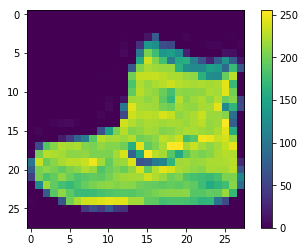

In [16]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0

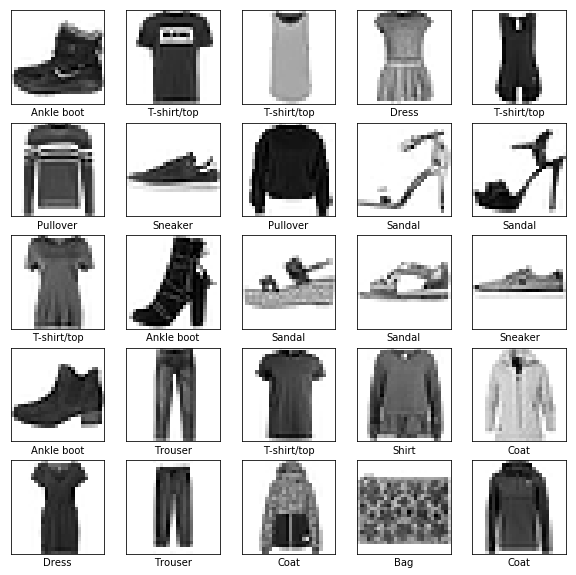

In [43]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [44]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [45]:
model1.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
model1.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 10s 162us/step - loss: 0.5044 - acc: 0.8222
Epoch 2/5
60000/60000 [==============================] - 8s 127us/step - loss: 0.3769 - acc: 0.8651
Epoch 3/5
60000/60000 [==============================] - 9s 155us/step - loss: 0.3398 - acc: 0.8766
Epoch 4/5
60000/60000 [==============================] - 8s 130us/step - loss: 0.3151 - acc: 0.8843
Epoch 5/5
60000/60000 [==============================] - 10s 164us/step - loss: 0.2959 - acc: 0.8916


In [47]:
test_loss, test_acc = model1.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)
print('Test accuracy:', test_loss)

10000/10000 [==============================] - 1s 62us/step
Test accuracy: 0.8769
Test accuracy: 0.35006834874153137


If rounded to the seconde decimal, the result is the same as the one reported in the tutorial (88%).


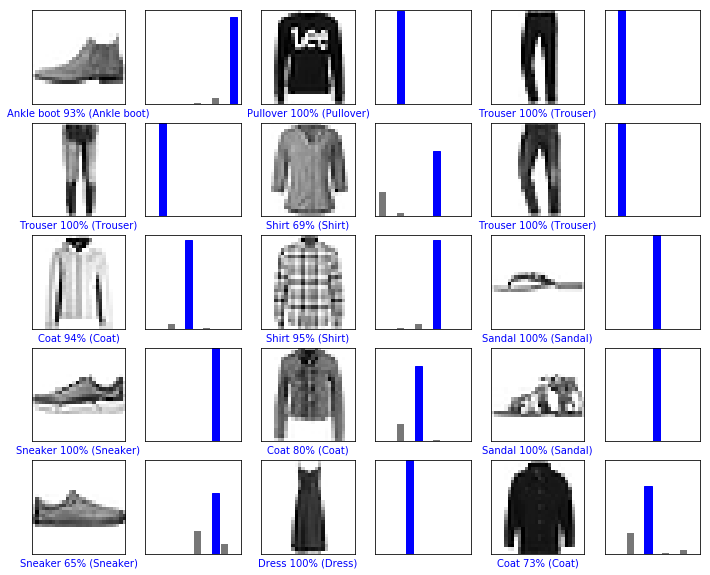

In [48]:
predictions = model1.predict(test_images)
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

## Step 2: I replaced the Fully-Connected layers with Convolutional layers so as to learn better feature representations. The last layers that maps the features to the 10 classes should remain the same. 

In [49]:
model2 = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.3),
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [50]:
model2.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
x_train = np.expand_dims(train_images, -1)
x_test = np.expand_dims(test_images, -1)
x_train.shape

(60000, 28, 28, 1)

In [52]:
model2.fit(x_train, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 145s 2ms/step - loss: 0.4955 - acc: 0.8213
Epoch 2/5
60000/60000 [==============================] - 146s 2ms/step - loss: 0.3511 - acc: 0.8716
Epoch 3/5
60000/60000 [==============================] - 144s 2ms/step - loss: 0.3114 - acc: 0.8865
Epoch 4/5
60000/60000 [==============================] - 140s 2ms/step - loss: 0.2829 - acc: 0.8957
Epoch 5/5
60000/60000 [==============================] - 153s 3ms/step - loss: 0.2592 - acc: 0.9032


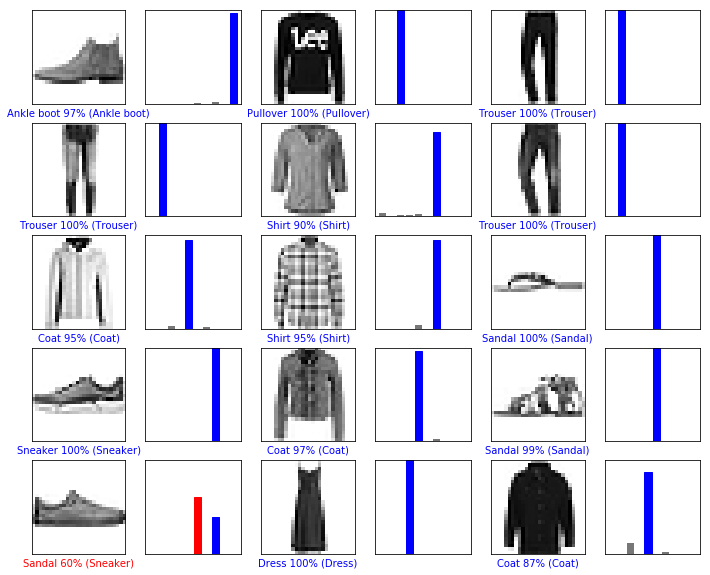

In [53]:
predictions = model2.predict(x_test)
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

The prediction accuracy increases on many fashion items but it also decreases on some items like sneakers or coat. Let's look at the over all performance of the model 2:

In [54]:
test_loss, test_acc = model2.evaluate(x_test, test_labels)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

10000/10000 [==============================] - 5s 533us/step
Test accuracy: 0.9029
Test loss: 0.25918229286670685


The accuracy result increases (from 88% to 91%) and the loss decreases (from 35% to 25%) comparing to the original model from the tutorial. This is good improvement.

## Step 3: Other designs to improve the performance of deep learning model

**Model 3: Conv2D + 2 Dense Layers**

In model 2, I only add 2 convolutional layers to the original model. Let's see what happen if I add 3 layers of convolution on top of 2 dense layers.

In [61]:
model3 = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.3),
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [62]:
model3.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model3.fit(x_train, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 137s 2ms/step - loss: 0.7624 - acc: 0.7160
Epoch 2/5
60000/60000 [==============================] - 132s 2ms/step - loss: 0.5274 - acc: 0.8038
Epoch 3/5
60000/60000 [==============================] - 129s 2ms/step - loss: 0.4640 - acc: 0.8292
Epoch 4/5
60000/60000 [==============================] - 130s 2ms/step - loss: 0.4270 - acc: 0.8414
Epoch 5/5
60000/60000 [==============================] - 137s 2ms/step - loss: 0.4063 - acc: 0.8488


In [63]:
test_loss, test_acc = model4.evaluate(x_test, test_labels)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

10000/10000 [==============================] - 7s 688us/step
Test accuracy: 0.8783
Test loss: 0.33361258561611173


Model 3 with 3 convolutional layers doesn't show an improvement from model 2 at all. The accuracy metric actually decrease. This model is not what we are looking for.

**Model 4: 2 Conv2D + LSTM + 2 Dense Layers**

So far, model 2 still has the best performance. I will focus on improving the performace of model 2 based on its existing layers. In model 5, I will add a LSTM (a special type of recurrent neural network) after the 2nd convolutional layer and before the first dense layer. LSTM are used to detect correlations over time, while convolutional layers serves well for capturing image or spatial features. This will help the model learn the feature of training images better. Let's put the model to test:

In [65]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, Activation, LSTM, Reshape, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D, Flatten, ConvLSTM2D, Conv2D, MaxPool2D
from keras.models import Sequential
from keras.layers.wrappers import TimeDistributed

model4=Sequential()
model4.add(Conv2D(64,kernel_size=(3,3),padding="valid",kernel_initializer='glorot_uniform',input_shape = (28,28,1)))
model4.add(Activation("relu"))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.2))
model4.add(Conv2D(32,kernel_size=(3,3),padding="valid",kernel_initializer='glorot_uniform',input_shape = (28,28,1)))
model4.add(Activation("relu"))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.2))
model4.add(TimeDistributed(LSTM(units=50,return_sequences=False,dropout=0.3,recurrent_dropout=0.3),input_shape=(15,15,64)))
model4.add(Flatten())
model4.add(Dense(128))
model4.add(Activation("relu"))
model4.add(Dense(10))
model4.add(Activation("softmax"))
model4.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [66]:
model4.fit(x_train, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 150s 2ms/step - loss: 0.6831 - acc: 0.7400
Epoch 2/5
60000/60000 [==============================] - 172s 3ms/step - loss: 0.4785 - acc: 0.8200 1s - loss: 0.478
Epoch 3/5
60000/60000 [==============================] - 137s 2ms/step - loss: 0.4167 - acc: 0.8440
Epoch 4/5
60000/60000 [==============================] - 129s 2ms/step - loss: 0.3801 - acc: 0.8586
Epoch 5/5
60000/60000 [==============================] - 152s 3ms/step - loss: 0.3540 - acc: 0.8658


In [67]:
test_loss, test_acc = model4.evaluate(x_test, test_labels)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

10000/10000 [==============================] - 7s 680us/step
Test accuracy: 0.8694
Test loss: 0.3455484426617622


Like model 3 and 4, model 5 with additional LSTM layer doesn't show an improvement from model 2 at all. The accuracy metric actually decrease. This is also not what we are looking for.

**Model 5: 4 Conv2D +  3 Dense Layers**

In my last attempt, I will change the design choice will be 4 convolutional layers + 3 dense layers. I believe the performance of the model will increase by adding more deep learning layers. In addition, I also add 4 features that will help boosting the peformance of this model:

1. I splitted the original training data (60,000 images) into 80% training (48,000 images) and 20% validation (12000 images) optimize the classifier, and I kept the test data (10,000 images). The cross validation set is added for the purpose of detecting over-fitting and to assist in hyper-parameter search. The test set is finally used to measure the actual performance of the model.

In [6]:
# TensorFlow and tf.keras
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=13)

train_images = X_train / 255.0
val_images = X_val / 225.0
test_images = test_images / 255.0

x_train = np.expand_dims(train_images, -1)
x_val = np.expand_dims(val_images, -1)
x_test = np.expand_dims(test_images, -1)

2. After splitting the training dataset, I performed a process called data augmentation, which generates new training samples by rotating, shifting and zooming on the training samples. The goal is that at training time, my model will never see the exact same picture twice. Hence, the model would avoid overfitting from having not enough samples to learn from. Keras has built-in function for this process from ImageDataGenerator modules.

In [7]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(x_train, y_train, batch_size=256)
val_batches = gen.flow(x_val, y_val, batch_size=256)

Using TensorFlow backend.


3. I added EarlyStopping function from keras.callbacks. Early stopping stops the training once the validation loss starts to increase (which signals that the validation accuracy starts to decrease). This helps preventing overfitting.  

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping

model5 = Sequential()
model5.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model5.add(BatchNormalization())

model5.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))

model5.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.25))

model5.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))

model5.add(Flatten())

model5.add(Dense(512, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))

model5.add(Dense(128, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))

model5.add(Dense(10, activation='softmax'))

model5.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
EarlyStopping(monitor='val_loss', patience=3)

4. I trained the model on 5 epoches using fit_generator, which helps training the model on data generated batch-by-batch. The batches were generated by ddata augmentation earlier. Because the batch size is 256, I set the step per epoch to 48000//256 (training size//batch size) and 12000//250 (validation size//batch size). I used to "//" for division andreturn results as an integer instead of float.

In [14]:
history1 = model5.fit_generator(batches, epochs=20,steps_per_epoch=48000//256,
                    validation_data=val_batches, validation_steps=12000//256)

Epoch 1/20
187/187 [==============================] - 526s 3s/step - loss: 0.2909 - acc: 0.8950 - val_loss: 0.2802 - val_acc: 0.8985
Epoch 2/20
187/187 [==============================] - 497s 3s/step - loss: 0.2913 - acc: 0.8943 - val_loss: 0.3196 - val_acc: 0.8800
Epoch 3/20
187/187 [==============================] - 497s 3s/step - loss: 0.2921 - acc: 0.8935 - val_loss: 0.2781 - val_acc: 0.8981
Epoch 4/20
187/187 [==============================] - 497s 3s/step - loss: 0.2798 - acc: 0.8992 - val_loss: 0.2588 - val_acc: 0.9056
Epoch 5/20
187/187 [==============================] - 497s 3s/step - loss: 0.2809 - acc: 0.8990 - val_loss: 0.2605 - val_acc: 0.9062
Epoch 6/20
187/187 [==============================] - 804s 4s/step - loss: 0.2712 - acc: 0.9017 - val_loss: 0.2788 - val_acc: 0.8962
Epoch 7/20
187/187 [==============================] - 932s 5s/step - loss: 0.2785 - acc: 0.8996 - val_loss: 0.2682 - val_acc: 0.9006
Epoch 8/20
187/187 [==============================] - 926s 5s/step - 

**Training and validation plot**

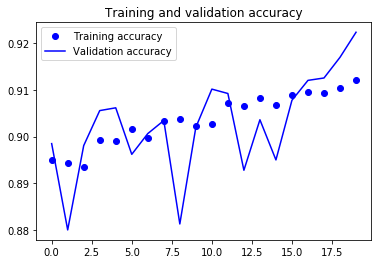

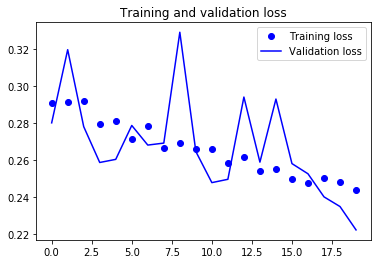

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history1.history['acc']
val_accuracy = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Performace of model 5 on testing set**

In [15]:
test_loss, test_acc = model4.evaluate(x_test, test_labels)

print('Test accuracy:', test_acc)
print('Test accuracy:', test_loss)

10000/10000 [==============================] - 41s 4ms/step
Test accuracy: 0.9195
Test accuracy: 0.21890906212329864


Model 5 (91% accuracy) has better performance than model 2 (90% accuracy) and, therefore, it has the best model of all. If possible, I would training it on more epoches (referably 50) so that it will train on more batches of data. However, a large number of epoches will require a better cpu power and I will need to train the model on a server. Othervise, it will take 2 days to train 50 epoches on my cpu. I performed the suggested model on the server of my school and printed out the results on a text file (results attached in the file "4_Conv_50_epoches.txt"). With 50 epoches, the accuracy increases to 92%.